# Exercise 2 | TKO_7092 Evaluation of Machine Learning Methods 2025
## deadline: 12.2.2025 - 23:59

Regarding any questions about this exercise, please contact course assistant Jonne Pohjankukka (jjepoh@utu.fi)

********************************************

Student name: Arttu Kuitunen

Student number: 1500155

Student email: arsaku@utu.fi

********************************************

## Water permeability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=7 (7NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 7-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 75 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 7NN model for the provided data set (refer to the lectures 3.1.3 and 3.1.4 in 'Evaluating spatial models with spatial cross-validation' for help). Estimate the water permeability prediction performance (using 7NN model and C-index) with the following distance parameter values: d = 0, 20, 40, ..., 300 (that is, 20 meter intervals from 0m to 300m). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. You can use third-party libraries (e.g. Scikit-learn) if you want for implementing e.g. the 7-nearest neighbor. Also, try to follow good programming practices and add comments to relevant parts of your code explaining what you are doing and why.


- Plot of the graph C-index vs. distance parameter value. 


<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [120]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import somersd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

### Read in the datasets

In [121]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).

input_data = pd.read_csv('input.csv', header=None)
output_data = pd.read_csv('output.csv', header=None)
coordinates_data = pd.read_csv('coordinates.csv', header=None)

print('Input data dimensions:', input_data.shape)
print('Output data dimensions:', output_data.shape)
print('Coordinates data dimensions:', coordinates_data.shape)

Input data dimensions: (1691, 75)
Output data dimensions: (1691, 1)
Coordinates data dimensions: (1691, 2)


### Standardization of the predictor features (input.csv)



In [122]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this. 

scaler = StandardScaler()

input_data_scaled = scaler.fit_transform(input_data.values)
input_data_scaled_df = pd.DataFrame(input_data_scaled)

input_data_scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,-0.053196,-0.219296,0.210020,0.704425,0.339477,0.412638,0.331074,-0.034411,-0.184481,0.307345,...,0.219541,0.539119,-0.645254,-0.519918,-0.447089,0.554097,0.087285,-0.109193,-0.913639,-0.461479
1,-0.632098,-0.682804,-0.285522,-0.369542,-0.138305,2.489725,2.051755,-0.034411,-0.246906,-0.226797,...,0.219541,-0.169259,-0.645254,2.475438,-0.447089,-0.288927,-0.035919,-1.481978,-1.087664,-0.461479
2,-0.674980,-0.597421,-0.568689,-0.983237,-0.828435,-0.496087,-0.451053,-0.034411,-0.324938,-0.627405,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.375320,-0.159124,0.349947,0.134707,-0.809315
3,-0.331927,-0.154649,1.307292,0.090730,0.419107,1.061728,0.956776,-0.034411,-0.301529,-0.360333,...,-1.047724,-0.877636,-0.645254,-0.519918,-0.447089,-0.383278,0.703308,0.467238,0.107450,-0.832933
4,-0.610657,-0.673046,-0.161636,-0.522966,-0.377196,0.672274,0.800351,-0.034411,-0.363954,-0.961244,...,-1.047724,-0.877636,2.098494,0.977760,1.960643,-0.296657,0.087285,-0.333328,-0.636876,-0.542584


Text(0.5, 1.0, 'PCA Results')

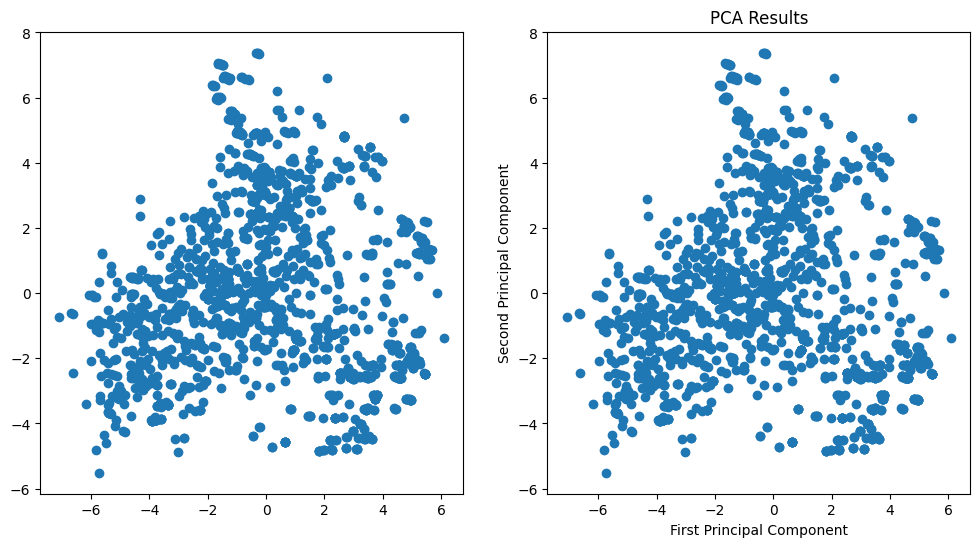

In [123]:
# PCA for visualization 

pca_unscaled = PCA(n_components=2).fit_transform(input_data)
pca_scaled = PCA(n_components=2).fit_transform(input_data_scaled)


data_pca_scaled_x = pca_scaled[:,0]
data_pca_scaled_y = pca_scaled[:,1]

data_pca_x = pca_unscaled[:,0]
data_pca_y = pca_unscaled[:,1]

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.scatter(data_pca_x, data_pca_y)
ax2.scatter(data_pca_scaled_x, data_pca_scaled_y)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Results')


In [124]:
# YOUR CODE



### Functions and analysis code

In [125]:
# Include here all the functions and other relevant code that you need in order to implement the task.

def SKVC(data, distance_value, distance_matrix):
    loo = LeaveOneOut()

    for train_i, test_i in loo.split(data):
        discarded_data = 

# Seuraavaksi :
# Poista train_setistä ne joiden etäisyys testi_pisteeseen on vähintään yhtäsuuri kuin distance_value
# Train 7NN
# Testaa train pisteellä
# ota c_index 

# Note! Utilize the following two functions in your implementation:

### Function for calculating C-index ###
# y: array containing true label values.
# yp: array containing the predicted label values.
def cindex(y, yp):
    n = 0
    h_num = 0 
    for i in range(0, len(y)):
        t = y[i]
        p = yp[i]
        for j in range(i+1, len(y)):
            nt = y[j]
            np = yp[j]
            if (t != nt): 
                n = n + 1
                if (p < np and t < nt) or (p > np and t > nt): 
                    h_num += 1
                elif (p == np):
                    h_num += 0.5
    return h_num/n


### Function for calculating the pairwise spatial distances between the data points ###
# The function will return a n-by-n matrix of Euclidean distances. For example, the
# distance_matrix element at indices i,j will contain the spatial distance between 
# data point i and j. Note that the element value is 0 always when i==j.
# coordinate_array: n-by-2 array containing the coordinates of the exercise data points.
def cdists(coordinate_array):
    number_of_observations = coordinate_array.shape[0]
    distance_matrix = np.zeros((number_of_observations, number_of_observations))
    for i in range(0, number_of_observations):
        distance_matrix[i, :] = np.sqrt(np.sum((coordinate_array - coordinate_array[i])**2, axis=1))
    return distance_matrix

### Results for spatial leave-one-out cross-validation with 7-nearest neighbor regression model

In [133]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
dist_matrix = cdists(coordinates_data.to_numpy())


# coordinates_data.head()
# coordinates_data.to_numpy()
# dist_matrix = cdists(coordinates_data)


# with 7-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

## Analysis of the results

### In this cell, you need to answer the client's questions:


1. What happens to the 7NN performance as the prediction distance increases?


2. Do you think the results behave as was somewhat expected? Do they make sense, why?


3. If we require that the 7NN must have at least C-index performance of 0.68, then up to what distance should we trust the 7NN predictions, based on the results?